In [1]:
#Import pandas, numpy, seaborn,matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load diabetes dataset from sklearn.datasets
from sklearn.datasets import load_diabetes

In [3]:
#Import the dataset and print the shape of data (e.g. variable X) and target(e.g. variable Y) of the diabetes dataset. 
diab = load_diabetes()
X = diab['data']
y = diab['target']
print(X.shape, y.shape)

(442, 10) (442,)


In [4]:
#Create a dataframe using the columns "age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu" and the target value as "progression".
#Display the top 5 rows of the data frame
#Hint: Use the variables created in previous step (e.g. X and Y)

#creating dataframe from X
df = pd.DataFrame(X, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])

#adding 'progression' from y
df['progression'] = y

#showing head
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
#Check for null values in dataframe. If there are null values handle those values
df.isnull().sum()

age            0
sex            0
bmi            0
bp             0
tc             0
ldl            0
hdl            0
tch            0
ltg            0
glu            0
progression    0
dtype: int64

In [6]:
#Write a Python program to view basic statistical details like percentile, mean, std etc
df.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


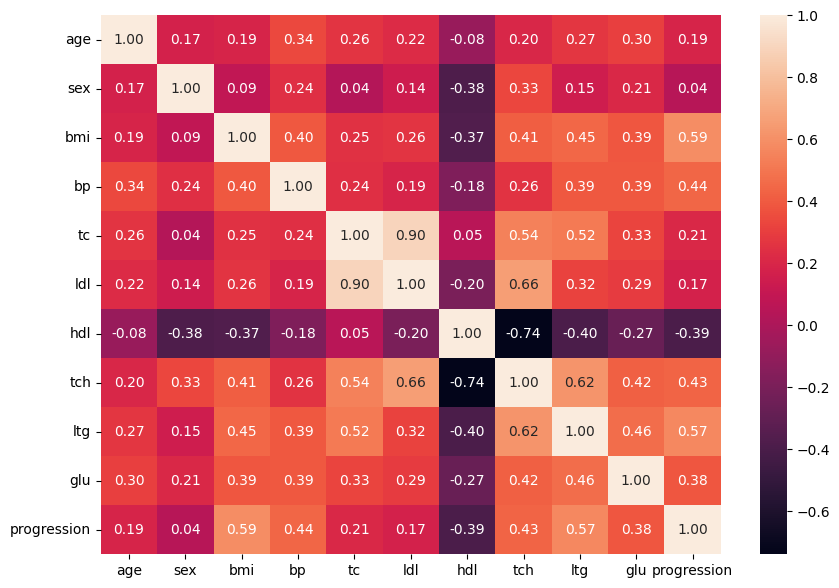

In [7]:
#Using a heatmap, visualize the correlations between data. Write down your observations.
#figure size
plt.figure(figsize=(10, 7))
#correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f')

<Figure size 1000x700 with 0 Axes>

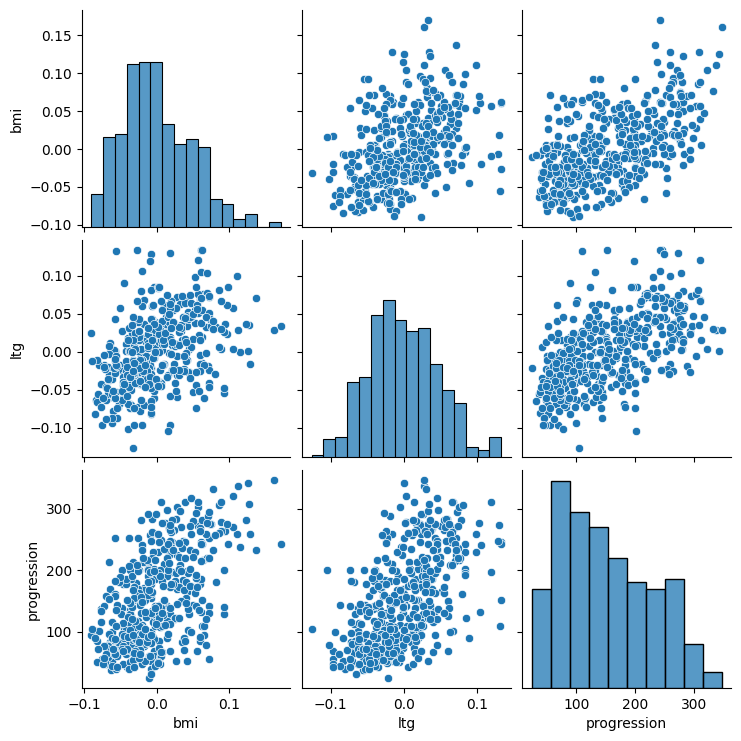

In [8]:
#Plot a graph (pairplot) using the attributes bmi, ltg and progression. Write down your observations.
#figure size
plt.figure(figsize=(10, 7))
#plotting graphs
sns.pairplot(df[['bmi', 'ltg', 'progression']])

In [9]:
#Write a Python program to split the dataset into its attributes (X) and labels (y). 
#The X variable contains all columns (i.e. attributes) except "progression" and y contains the label of the dataset, i.e. "progression"
#defining features
X = df.iloc[:,:-1]

#defining label
y = df['progression']

In [10]:
#Write a Python program using Scikit-learn to split the dataset into 80% train data and 20% test data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Train or fit the data into the model and calculate the accuracy of the model using the LinearRegression Algorithm
#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
#predictions
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

train_accuracy = reg.score(X_train, y_train)
print("Training data accuracy:",train_accuracy)

test_accuracy = reg.score(X_test, y_test)
print("Test data accuracy:",test_accuracy)

Training data accuracy: 0.5279193863361497
Test data accuracy: 0.4526027629719195
